In [1]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
        if img is not None:
            images.append(img)
    return images

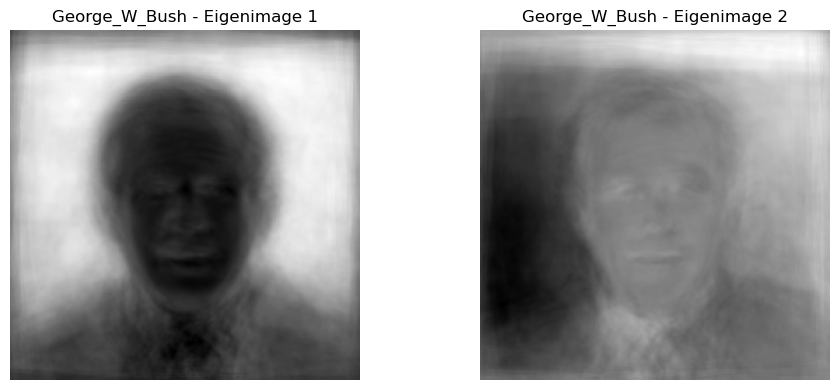

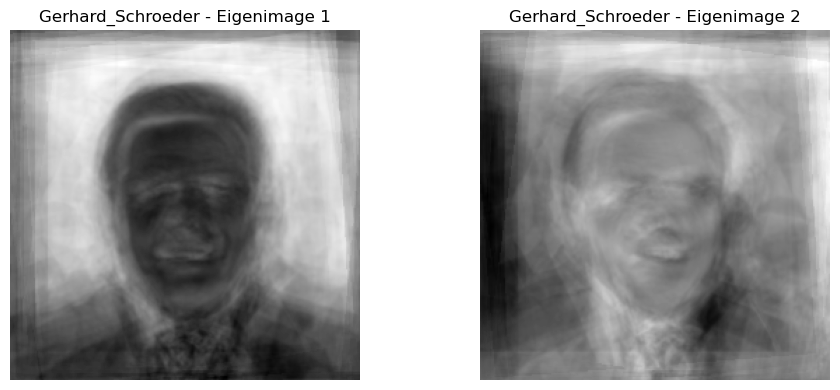

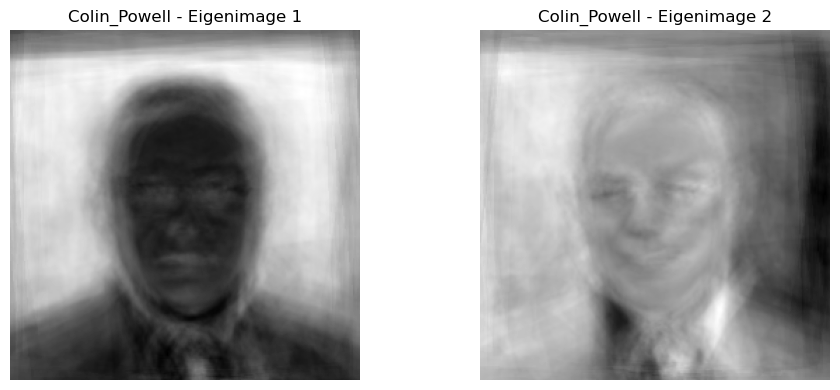

In [6]:
faces_dirs = ["George_W_Bush", "Gerhard_Schroeder", "Colin_Powell"]

for face in faces_dirs:
    faces_dir = f"./dataset/faces/{face}"

    images = load_images_from_folder(faces_dir)

    # Convert images to numpy array
    data = np.array(images)

    # Flatten the images into vectors
    data = data.reshape(data.shape[0], -1)

    # Apply PCA
    pca = PCA(n_components=2)  # Choose the number of principal components
    pca.fit(data)

    # Visualize the eigenimages (eigenvectors)
    eigenimages = pca.components_.reshape(-1, images[0].shape[0], images[0].shape[1])
    num_eigenimages = min(len(eigenimages), 5)
    fig, axes = plt.subplots(1, num_eigenimages, figsize=(10, 4))
    for i in range(num_eigenimages):
        axes[i].imshow(eigenimages[i], cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f'{face} - Eigenimage {i+1}')
    plt.tight_layout()
    plt.show()
